Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, initializers
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
# Global randoms
tf.random.set_seed(42)
np.random.seed(42)

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35080 entries, 0 to 35079
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           35080 non-null  float64
 1   rooms                  35080 non-null  float64
 2   floor                  35080 non-null  float64
 3   floorCount             35080 non-null  float64
 4   buildYear              35080 non-null  float64
 5   latitude               35080 non-null  float64
 6   longitude              35080 non-null  float64
 7   centreDistance         35080 non-null  float64
 8   poiCount               35080 non-null  float64
 9   hasParkingSpace        35080 non-null  int64  
 10  hasBalcony             35080 non-null  int64  
 11  hasElevator            35080 non-null  int64  
 12  hasSecurity            35080 non-null  int64  
 13  hasStorageRoom         35080 non-null  int64  
 14  price                  35080 non-null  int64  
 15  of

In [5]:
def create_model():
    model = models.Sequential(
    [
        layers.InputLayer(input_shape=32),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mean_absolute_percentage_error', 'mean_absolute_error', 'logcosh'])
    return model

In [6]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 51094302720.0000 - mean_absolute_percentage_error: 21.7039 - mean_absolute_error: 141998.3594 - logcosh: 141997.7344
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20637372416.0000 - mean_absolute_percentage_error: 14.6960 - mean_absolute_error: 99304.2891 - logcosh: 99303.5312
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20013873152.0000 - mean_absolute_percentage_error: 14.3714 - mean_absolute_error: 97421.7812 - logcosh: 97421.0547
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19162578944.0000 - mean_absolute_percentage_error: 13.9296 - mean_absolute_error: 94829.9297 - logcosh: 94829.1406
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 18882514944.0000 - mean_absolute_percentage_error: 13.7813 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10482622464.0000 - mean_absolute_percentage_error: 10.6348 - mean_absolute_error: 71069.0156 - logcosh: 71068.2969
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 10537102336.0000 - mean_absolute_percentage_error: 10.6575 - mean_absolute_error: 71245.0000 - logcosh: 71244.3359
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10197773312.0000 - mean_absolute_percentage_error: 10.5026 - mean_absolute_error: 70229.2500 - logcosh: 70228.5625
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10081090560.0000 - mean_absolute_percentage_error: 10.4322 - mean_absolute_error: 69669.3672 - logcosh: 69668.6172
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10035018752.0000 - mean_absolute_percentage_error: 10.4454 - mean_absolute_error: 69697.6250 - logcosh: 69696.8750
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 4955140608.0000 - mean_absolute_percentage_error: 7.4091 - mean_absolute_error: 48879.0312 - logcosh: 48878.3320
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5034438656.0000 - mean_absolute_percentage_error: 7.5079 - mean_absolute_error: 49562.8906 - logcosh: 49562.2383
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 4692634624.0000 - mean_absolute_percentage_error: 7.2159 - mean_absolute_error: 47527.8047 - logcosh: 47527.0820
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 4737227264.0000 - mean_absolute_percentage_error: 7.2565 - mean_absolute_error: 47588.4180 - logcosh: 47587.7188
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 4499052544.0000 - mean_absolute_percentage_error: 7.0537 - mean_absolute_error: 46437.7930 - logcosh: 46437.1250
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

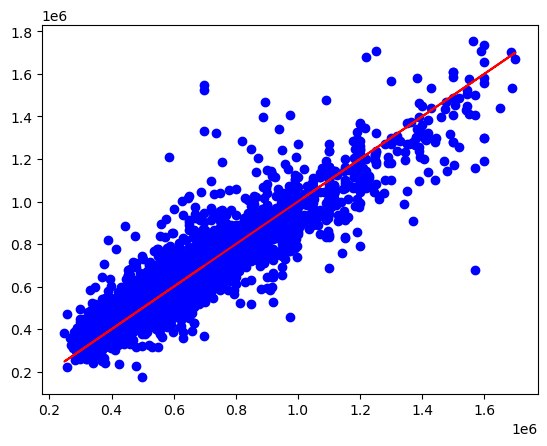

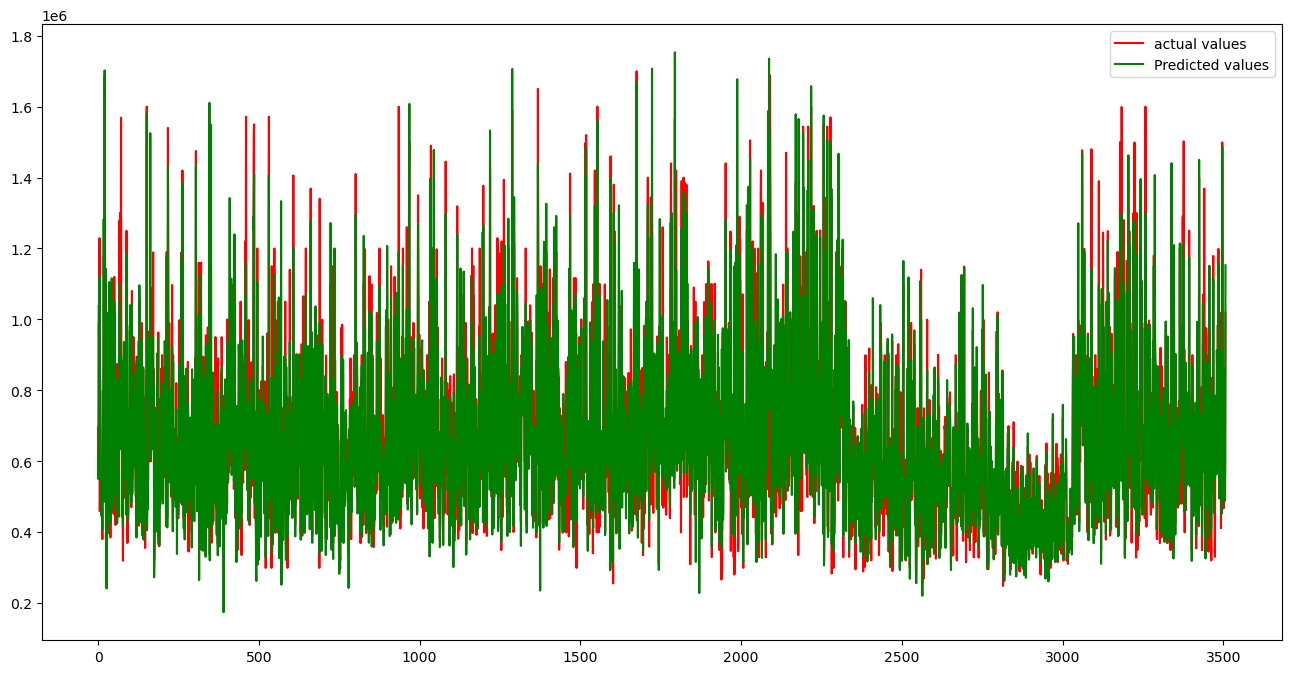

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 53816745984.0000 - mean_absolute_percentage_error: 21.8236 - mean_absolute_error: 145220.6719 - logcosh: 145219.9688
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20989206528.0000 - mean_absolute_percentage_error: 14.6590 - mean_absolute_error: 100534.4688 - logcosh: 100533.8516
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20311619584.0000 - mean_absolute_percentage_error: 14.3513 - mean_absolute_error: 98558.5156 - logcosh: 98557.8750
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19521630208.0000 - mean_absolute_percentage_error: 13.9813 - mean_absolute_error: 96259.9922 - logcosh: 96259.3125
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19223914496.0000 - mean_absolute_percentage_error: 13.8562 - mea

987/987 [==============================] - 3s 3ms/step - loss: 10967258112.0000 - mean_absolute_percentage_error: 10.7855 - mean_absolute_error: 73025.9922 - logcosh: 73025.2656
Epoch 44/100
987/987 [==============================] - 2s 3ms/step - loss: 11088189440.0000 - mean_absolute_percentage_error: 10.7915 - mean_absolute_error: 73304.4531 - logcosh: 73303.7578
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10769164288.0000 - mean_absolute_percentage_error: 10.6073 - mean_absolute_error: 72120.2500 - logcosh: 72119.5625
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10612898816.0000 - mean_absolute_percentage_error: 10.5906 - mean_absolute_error: 71867.1719 - logcosh: 71866.4531
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10415334400.0000 - mean_absolute_percentage_error: 10.5091 - mean_absolute_error: 71180.4141 - logcosh: 71179.7734
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 4974368768.0000 - mean_absolute_percentage_error: 7.3397 - mean_absolute_error: 49230.9180 - logcosh: 49230.2227
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 4812929536.0000 - mean_absolute_percentage_error: 7.3069 - mean_absolute_error: 48792.2109 - logcosh: 48791.5078
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 4756455936.0000 - mean_absolute_percentage_error: 7.2599 - mean_absolute_error: 48506.2617 - logcosh: 48505.5430
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 4578996224.0000 - mean_absolute_percentage_error: 7.1742 - mean_absolute_error: 47754.9648 - logcosh: 47754.2969
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 4527484928.0000 - mean_absolute_percentage_error: 7.1009 - mean_absolute_error: 47275.3516 - logcosh: 47274.6523
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

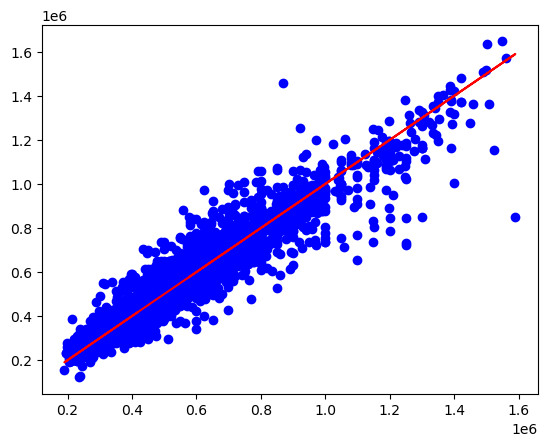

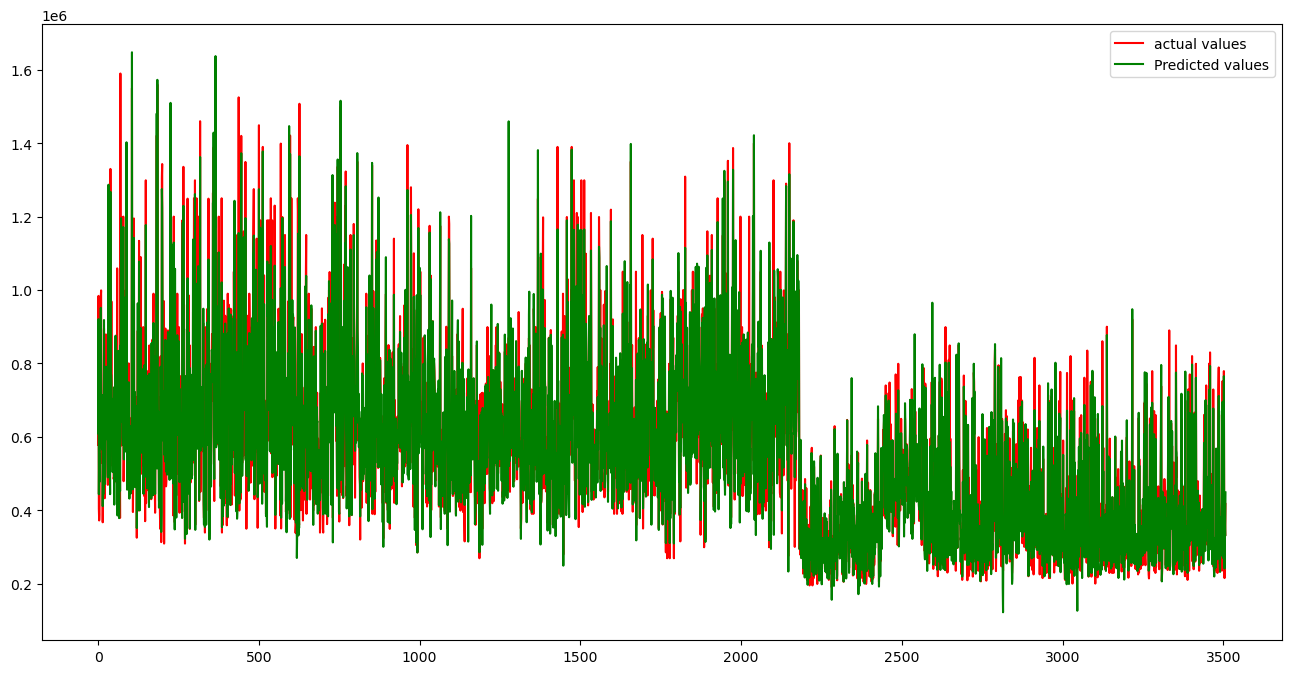

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 50836103168.0000 - mean_absolute_percentage_error: 21.6827 - mean_absolute_error: 141090.9531 - logcosh: 141090.2969
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 19784011776.0000 - mean_absolute_percentage_error: 14.5361 - mean_absolute_error: 97545.1719 - logcosh: 97544.4922
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 19022131200.0000 - mean_absolute_percentage_error: 14.1766 - mean_absolute_error: 95190.0781 - logcosh: 95189.3047
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 18502621184.0000 - mean_absolute_percentage_error: 13.8815 - mean_absolute_error: 93584.8594 - logcosh: 93584.2266
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 18285236224.0000 - mean_absolute_percentage_error: 13.8061 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 11082256384.0000 - mean_absolute_percentage_error: 11.0039 - mean_absolute_error: 73174.0234 - logcosh: 73173.3828
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 11081099264.0000 - mean_absolute_percentage_error: 11.0132 - mean_absolute_error: 73377.9531 - logcosh: 73377.2734
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10933022720.0000 - mean_absolute_percentage_error: 10.9659 - mean_absolute_error: 73067.3516 - logcosh: 73066.6484
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10661150720.0000 - mean_absolute_percentage_error: 10.8400 - mean_absolute_error: 72015.5781 - logcosh: 72014.9922
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10550153216.0000 - mean_absolute_percentage_error: 10.8206 - mean_absolute_error: 71946.1797 - logcosh: 71945.4609
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5583092736.0000 - mean_absolute_percentage_error: 8.0311 - mean_absolute_error: 52457.9609 - logcosh: 52457.2539
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5613208576.0000 - mean_absolute_percentage_error: 8.0488 - mean_absolute_error: 52543.8203 - logcosh: 52543.1797
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 5416810496.0000 - mean_absolute_percentage_error: 7.9513 - mean_absolute_error: 51794.5977 - logcosh: 51793.9297
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 5173288448.0000 - mean_absolute_percentage_error: 7.7740 - mean_absolute_error: 50616.4492 - logcosh: 50615.7539
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 5067235840.0000 - mean_absolute_percentage_error: 7.7438 - mean_absolute_error: 50207.6016 - logcosh: 50206.8828
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

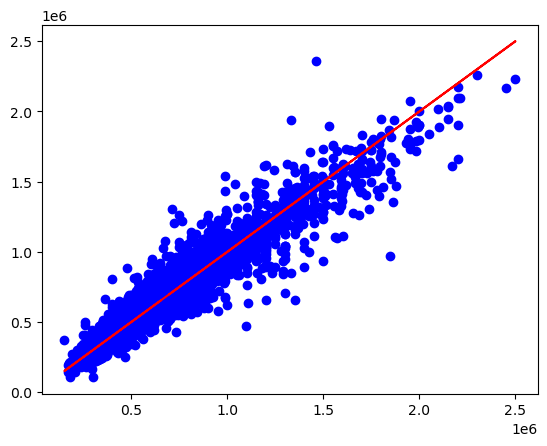

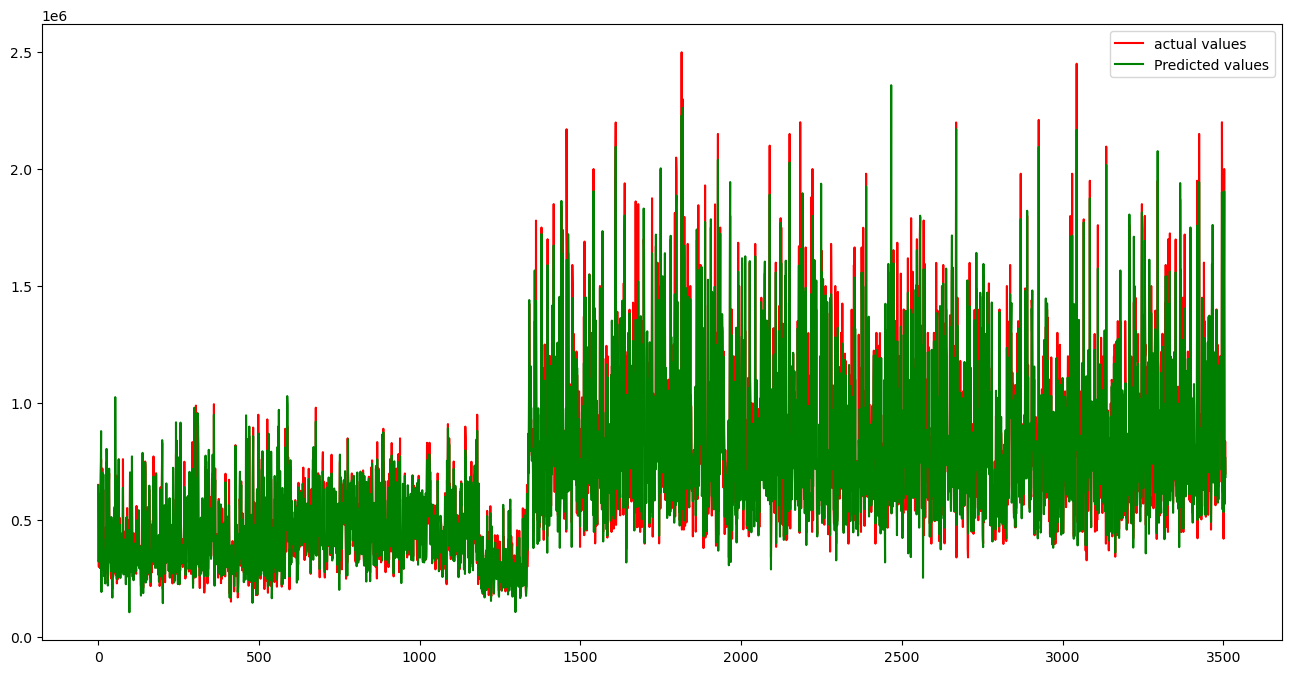

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 47604555776.0000 - mean_absolute_percentage_error: 21.1427 - mean_absolute_error: 137239.3750 - logcosh: 137238.6406
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 19594942464.0000 - mean_absolute_percentage_error: 14.4410 - mean_absolute_error: 96641.4453 - logcosh: 96640.7266
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 18924548096.0000 - mean_absolute_percentage_error: 14.1272 - mean_absolute_error: 94640.5703 - logcosh: 94639.8516
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 18312042496.0000 - mean_absolute_percentage_error: 13.8070 - mean_absolute_error: 92799.9922 - logcosh: 92799.3203
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 18028961792.0000 - mean_absolute_percentage_error: 13.6858 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10762312704.0000 - mean_absolute_percentage_error: 10.8053 - mean_absolute_error: 71699.8906 - logcosh: 71699.2031
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 10666251264.0000 - mean_absolute_percentage_error: 10.7343 - mean_absolute_error: 71433.0781 - logcosh: 71432.3516
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10459879424.0000 - mean_absolute_percentage_error: 10.6395 - mean_absolute_error: 70781.3438 - logcosh: 70780.6094
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10178511872.0000 - mean_absolute_percentage_error: 10.5136 - mean_absolute_error: 69869.4141 - logcosh: 69868.7031
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 9995780096.0000 - mean_absolute_percentage_error: 10.4815 - mean_absolute_error: 69312.0156 - logcosh: 69311.3281
Epoch 48/100
987/987 [==============================] - 3s 

987/987 [==============================] - 3s 3ms/step - loss: 4468912128.0000 - mean_absolute_percentage_error: 7.2470 - mean_absolute_error: 46921.6719 - logcosh: 46920.9961
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 4409413632.0000 - mean_absolute_percentage_error: 7.1870 - mean_absolute_error: 46509.5469 - logcosh: 46508.8477
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 4363263488.0000 - mean_absolute_percentage_error: 7.2018 - mean_absolute_error: 46535.9414 - logcosh: 46535.1953
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 4187680256.0000 - mean_absolute_percentage_error: 7.0469 - mean_absolute_error: 45590.4414 - logcosh: 45589.7656
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 3950472448.0000 - mean_absolute_percentage_error: 6.8748 - mean_absolute_error: 44210.5039 - logcosh: 44209.7344
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

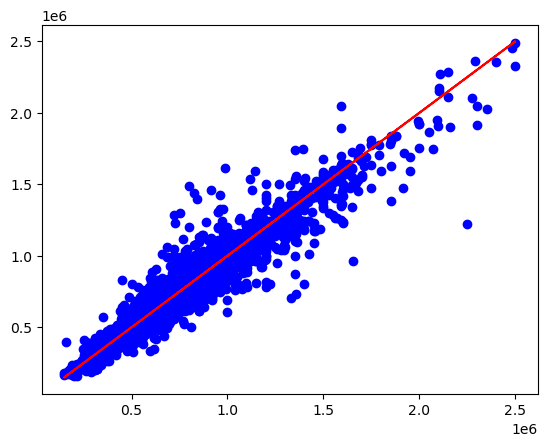

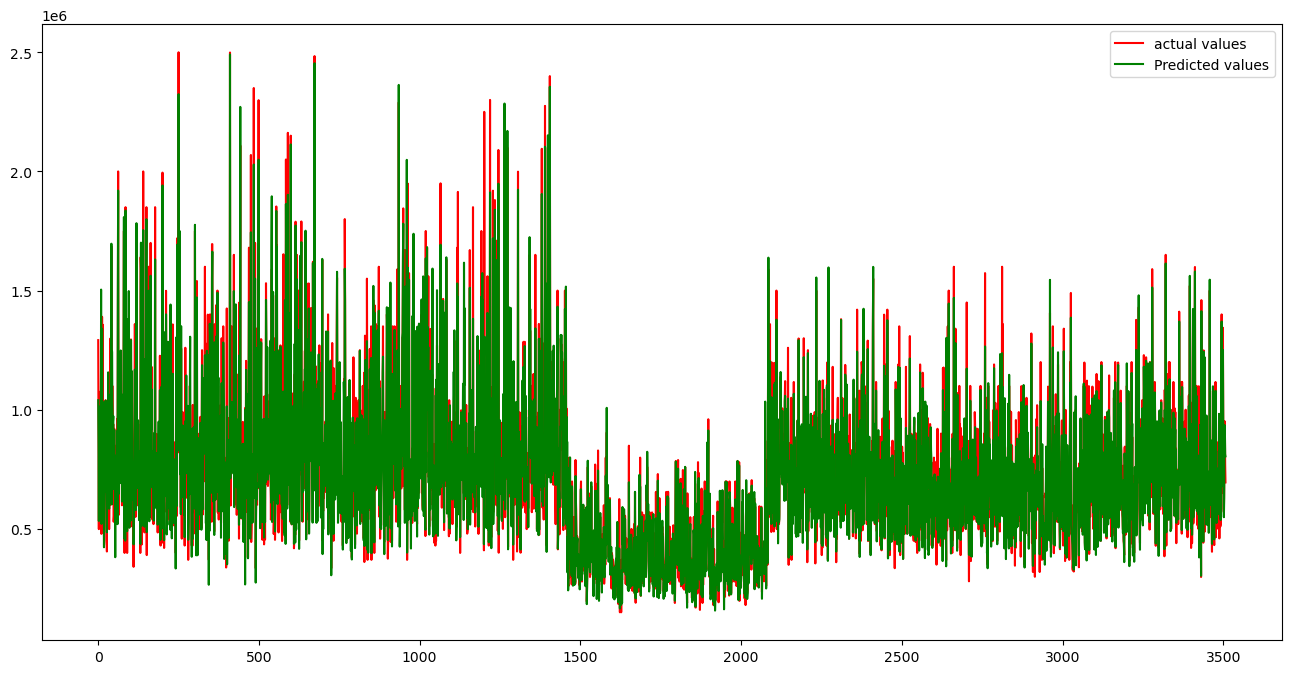

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 52328718336.0000 - mean_absolute_percentage_error: 21.7956 - mean_absolute_error: 142836.1094 - logcosh: 142835.4062
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20893446144.0000 - mean_absolute_percentage_error: 14.7666 - mean_absolute_error: 99748.8906 - logcosh: 99748.1797
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20334024704.0000 - mean_absolute_percentage_error: 14.4995 - mean_absolute_error: 98126.5547 - logcosh: 98125.9219
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19511869440.0000 - mean_absolute_percentage_error: 14.1056 - mean_absolute_error: 95861.7812 - logcosh: 95861.1328
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19036968960.0000 - mean_absolute_percentage_error: 13.8585 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 11699505152.0000 - mean_absolute_percentage_error: 11.1434 - mean_absolute_error: 74907.6875 - logcosh: 74907.0234
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 11429605376.0000 - mean_absolute_percentage_error: 11.0270 - mean_absolute_error: 74079.0625 - logcosh: 74078.3984
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 11260852224.0000 - mean_absolute_percentage_error: 10.9721 - mean_absolute_error: 73589.0156 - logcosh: 73588.3828
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10912098304.0000 - mean_absolute_percentage_error: 10.8294 - mean_absolute_error: 72569.9219 - logcosh: 72569.2031
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 11150176256.0000 - mean_absolute_percentage_error: 10.9746 - mean_absolute_error: 73555.3359 - logcosh: 73554.5625
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5870192640.0000 - mean_absolute_percentage_error: 8.1253 - mean_absolute_error: 53430.0859 - logcosh: 53429.3789
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5874321920.0000 - mean_absolute_percentage_error: 8.1486 - mean_absolute_error: 53379.8711 - logcosh: 53379.1602
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 5549307392.0000 - mean_absolute_percentage_error: 7.9725 - mean_absolute_error: 52184.2344 - logcosh: 52183.5859
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 5634766336.0000 - mean_absolute_percentage_error: 8.0639 - mean_absolute_error: 52845.3594 - logcosh: 52844.6328
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 5593726976.0000 - mean_absolute_percentage_error: 7.9704 - mean_absolute_error: 52166.1055 - logcosh: 52165.4570
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

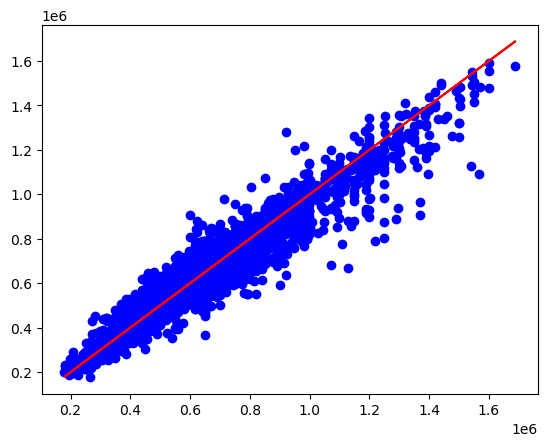

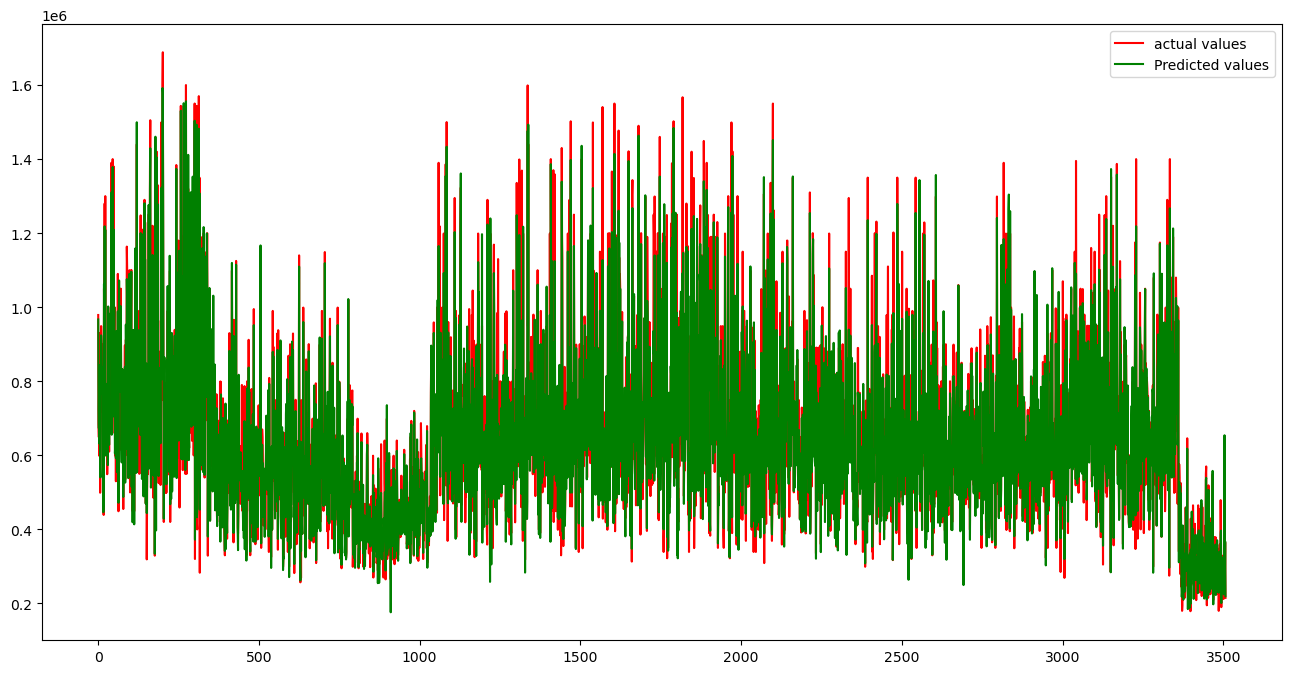

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 52550508544.0000 - mean_absolute_percentage_error: 21.8428 - mean_absolute_error: 144505.3906 - logcosh: 144504.7031
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20867604480.0000 - mean_absolute_percentage_error: 14.7318 - mean_absolute_error: 100651.8438 - logcosh: 100651.0625
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20289490944.0000 - mean_absolute_percentage_error: 14.4306 - mean_absolute_error: 98796.7344 - logcosh: 98796.1484
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19385415680.0000 - mean_absolute_percentage_error: 13.9956 - mean_absolute_error: 96230.2578 - logcosh: 96229.5703
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19016810496.0000 - mean_absolute_percentage_error: 13.8359 - mea

987/987 [==============================] - 3s 3ms/step - loss: 11549336576.0000 - mean_absolute_percentage_error: 11.0235 - mean_absolute_error: 75058.7031 - logcosh: 75058.0547
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 11389702144.0000 - mean_absolute_percentage_error: 10.9340 - mean_absolute_error: 74491.5938 - logcosh: 74490.8438
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 11138786304.0000 - mean_absolute_percentage_error: 10.8296 - mean_absolute_error: 73726.6719 - logcosh: 73725.9375
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10802117632.0000 - mean_absolute_percentage_error: 10.6905 - mean_absolute_error: 72695.5625 - logcosh: 72694.8281
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10791019520.0000 - mean_absolute_percentage_error: 10.6857 - mean_absolute_error: 72600.2891 - logcosh: 72599.5938
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5366979584.0000 - mean_absolute_percentage_error: 7.7866 - mean_absolute_error: 51715.7578 - logcosh: 51715.0664
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5383951872.0000 - mean_absolute_percentage_error: 7.8258 - mean_absolute_error: 52074.1055 - logcosh: 52073.4062
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 4977967104.0000 - mean_absolute_percentage_error: 7.5680 - mean_absolute_error: 50059.3789 - logcosh: 50058.6875
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 5149357568.0000 - mean_absolute_percentage_error: 7.6647 - mean_absolute_error: 50868.3281 - logcosh: 50867.5938
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 5041747968.0000 - mean_absolute_percentage_error: 7.5527 - mean_absolute_error: 50194.6875 - logcosh: 50193.9766
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

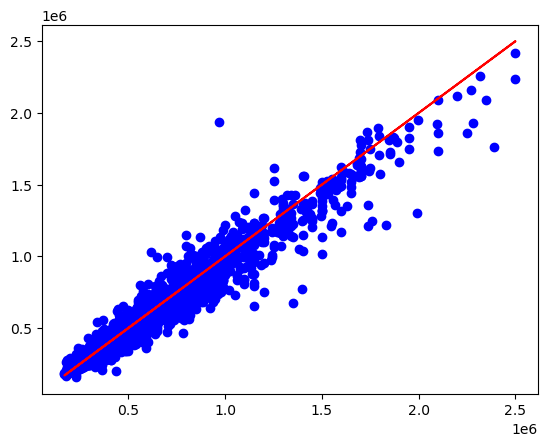

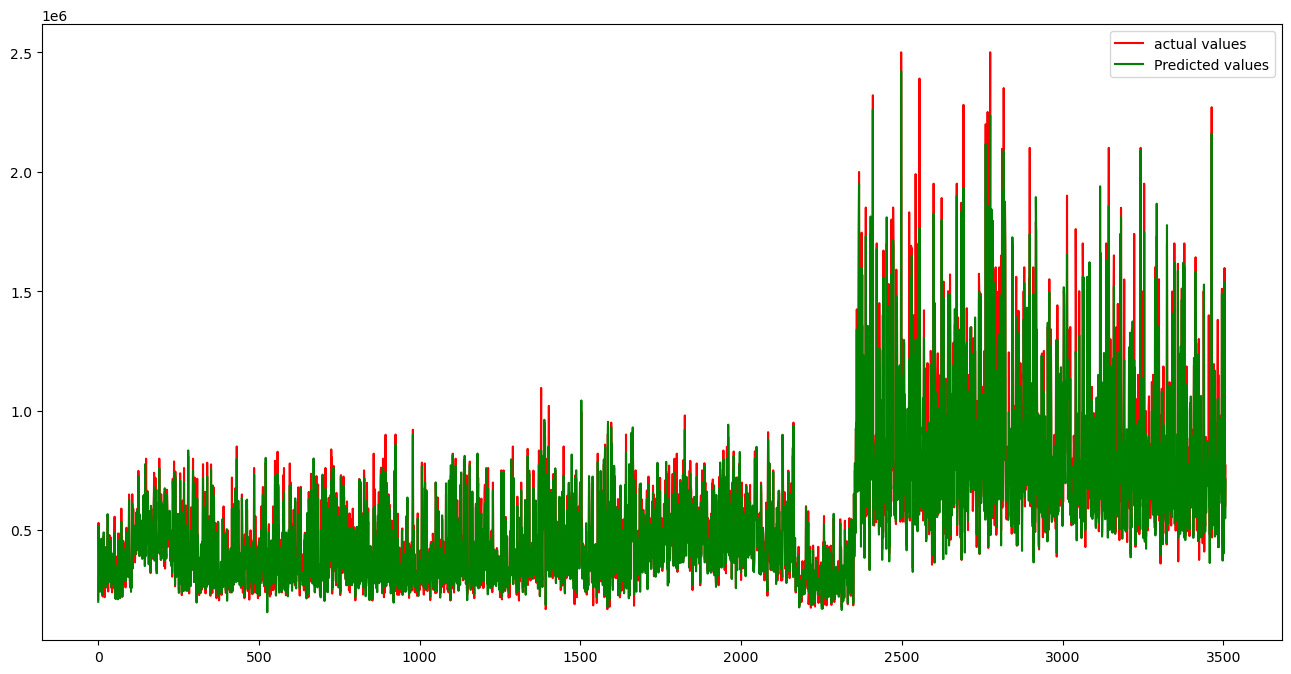

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 47682314240.0000 - mean_absolute_percentage_error: 21.3935 - mean_absolute_error: 137298.2344 - logcosh: 137297.6094
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 19389415424.0000 - mean_absolute_percentage_error: 14.6609 - mean_absolute_error: 96621.6875 - logcosh: 96621.0000
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 18386708480.0000 - mean_absolute_percentage_error: 14.1627 - mean_absolute_error: 93542.6641 - logcosh: 93542.0312
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 17813276672.0000 - mean_absolute_percentage_error: 13.8377 - mean_absolute_error: 91847.0625 - logcosh: 91846.3047
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 17557630976.0000 - mean_absolute_percentage_error: 13.7493 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10912816128.0000 - mean_absolute_percentage_error: 10.9978 - mean_absolute_error: 72471.4688 - logcosh: 72470.7031
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 10599470080.0000 - mean_absolute_percentage_error: 10.8525 - mean_absolute_error: 71486.1562 - logcosh: 71485.4375
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10457102336.0000 - mean_absolute_percentage_error: 10.7717 - mean_absolute_error: 70960.0469 - logcosh: 70959.3281
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10182141952.0000 - mean_absolute_percentage_error: 10.6475 - mean_absolute_error: 70078.6172 - logcosh: 70077.8516
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10333992960.0000 - mean_absolute_percentage_error: 10.7301 - mean_absolute_error: 70535.4609 - logcosh: 70534.8359
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5337047040.0000 - mean_absolute_percentage_error: 7.8650 - mean_absolute_error: 50796.4336 - logcosh: 50795.8320
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5220265472.0000 - mean_absolute_percentage_error: 7.8461 - mean_absolute_error: 50608.8242 - logcosh: 50608.1953
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 4938898432.0000 - mean_absolute_percentage_error: 7.6398 - mean_absolute_error: 49162.8750 - logcosh: 49162.1836
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 4869474816.0000 - mean_absolute_percentage_error: 7.6272 - mean_absolute_error: 49016.6289 - logcosh: 49015.9883
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 5134074368.0000 - mean_absolute_percentage_error: 7.7213 - mean_absolute_error: 49968.6602 - logcosh: 49967.9531
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

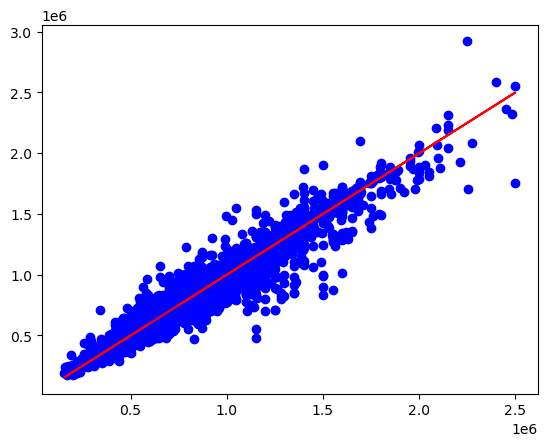

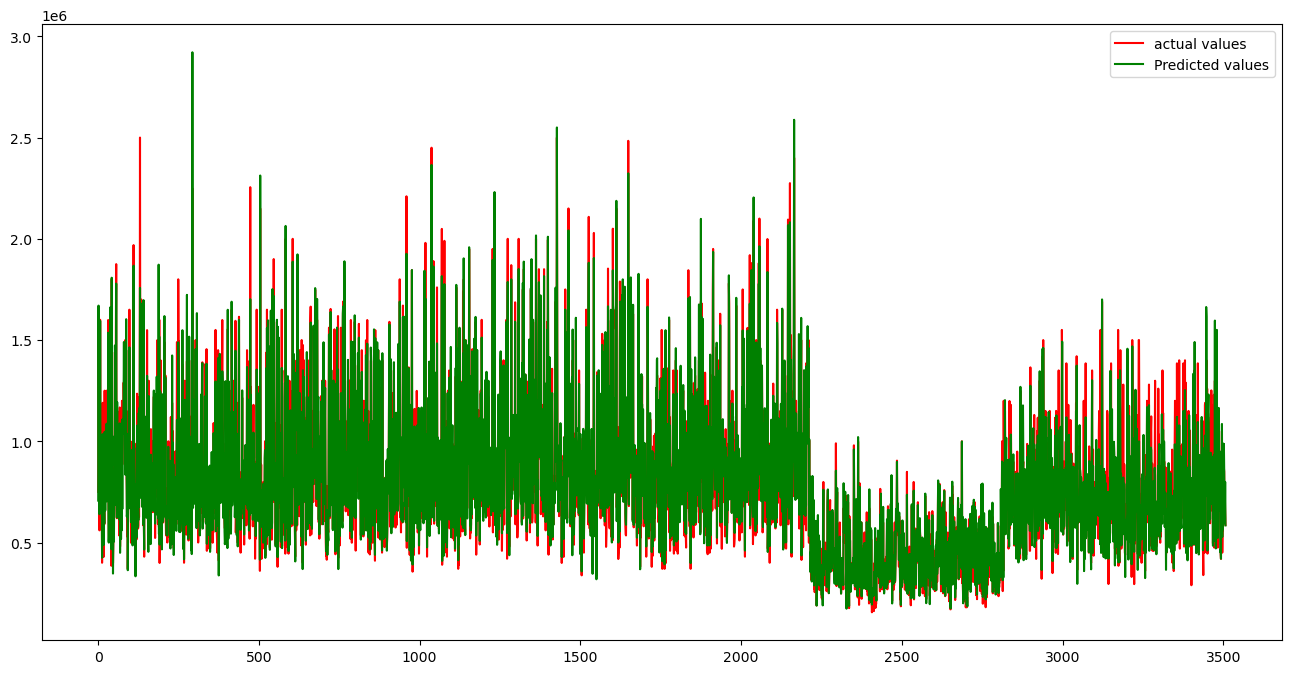

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 52645150720.0000 - mean_absolute_percentage_error: 22.0727 - mean_absolute_error: 143688.3594 - logcosh: 143687.5469
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20964667392.0000 - mean_absolute_percentage_error: 14.8963 - mean_absolute_error: 99973.2969 - logcosh: 99972.5625
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20376700928.0000 - mean_absolute_percentage_error: 14.6226 - mean_absolute_error: 98223.5391 - logcosh: 98222.8047
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19287746560.0000 - mean_absolute_percentage_error: 14.0478 - mean_absolute_error: 94836.4766 - logcosh: 94835.7891
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19196168192.0000 - mean_absolute_percentage_error: 14.0671 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 11139296256.0000 - mean_absolute_percentage_error: 10.9533 - mean_absolute_error: 72969.1953 - logcosh: 72968.4453
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 10759384064.0000 - mean_absolute_percentage_error: 10.8060 - mean_absolute_error: 71860.8906 - logcosh: 71860.2500
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 10565843968.0000 - mean_absolute_percentage_error: 10.7109 - mean_absolute_error: 71250.3125 - logcosh: 71249.5703
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 10277232640.0000 - mean_absolute_percentage_error: 10.5849 - mean_absolute_error: 70343.0312 - logcosh: 70342.3281
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 10681021440.0000 - mean_absolute_percentage_error: 10.7399 - mean_absolute_error: 71449.1875 - logcosh: 71448.5000
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5514783744.0000 - mean_absolute_percentage_error: 8.0485 - mean_absolute_error: 52143.4297 - logcosh: 52142.7227
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5227443200.0000 - mean_absolute_percentage_error: 7.8794 - mean_absolute_error: 50992.2695 - logcosh: 50991.6562
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 5129051136.0000 - mean_absolute_percentage_error: 7.8115 - mean_absolute_error: 50507.5156 - logcosh: 50506.8477
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 5131443712.0000 - mean_absolute_percentage_error: 7.7985 - mean_absolute_error: 50518.2812 - logcosh: 50517.4961
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 4881818112.0000 - mean_absolute_percentage_error: 7.6056 - mean_absolute_error: 49189.4141 - logcosh: 49188.7383
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

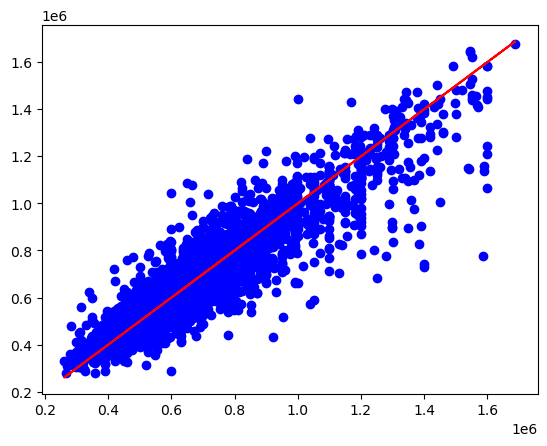

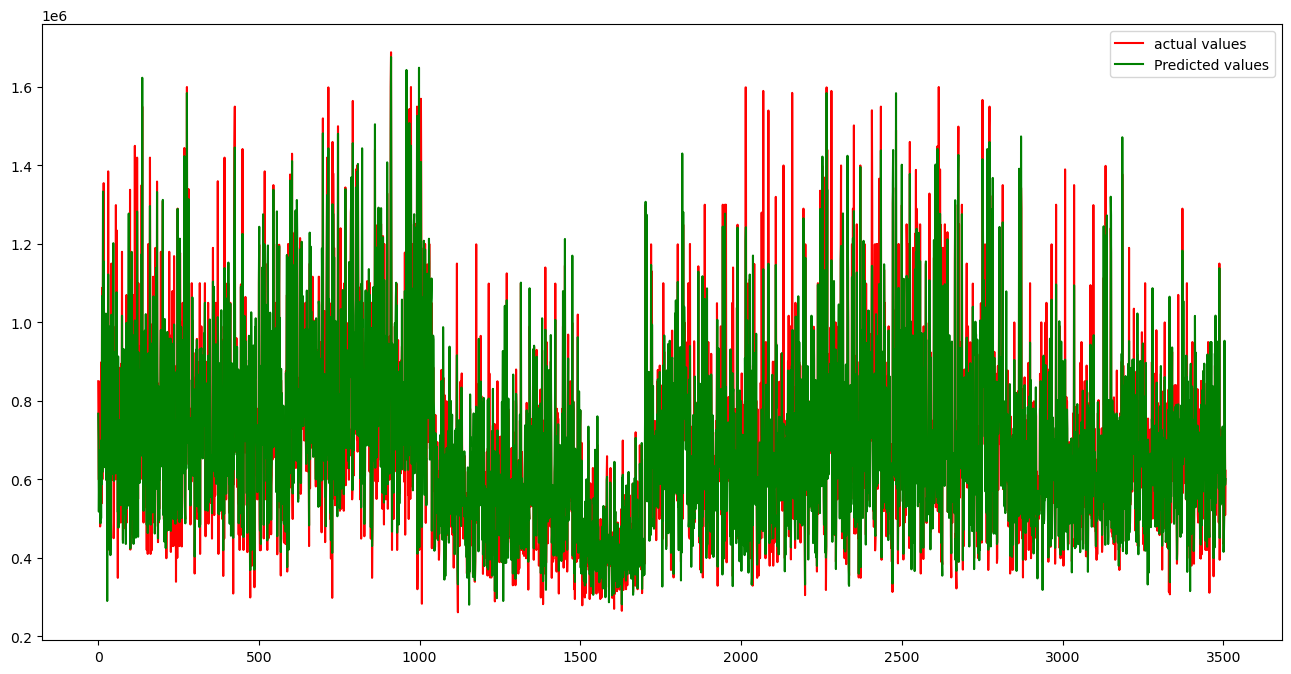

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 56835346432.0000 - mean_absolute_percentage_error: 22.1591 - mean_absolute_error: 148781.9375 - logcosh: 148781.2656
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 21484922880.0000 - mean_absolute_percentage_error: 14.6911 - mean_absolute_error: 101693.8672 - logcosh: 101693.1875
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20766291968.0000 - mean_absolute_percentage_error: 14.3671 - mean_absolute_error: 99521.2344 - logcosh: 99520.5625
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19830624256.0000 - mean_absolute_percentage_error: 13.9550 - mean_absolute_error: 96896.1641 - logcosh: 96895.5625
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19535851520.0000 - mean_absolute_percentage_error: 13.8469 - mea

987/987 [==============================] - 3s 3ms/step - loss: 11844843520.0000 - mean_absolute_percentage_error: 11.1074 - mean_absolute_error: 75911.9141 - logcosh: 75911.2109
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 11521891328.0000 - mean_absolute_percentage_error: 10.9510 - mean_absolute_error: 74860.3438 - logcosh: 74859.6250
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 11395480576.0000 - mean_absolute_percentage_error: 10.9242 - mean_absolute_error: 74563.4375 - logcosh: 74562.7266
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 11046326272.0000 - mean_absolute_percentage_error: 10.7952 - mean_absolute_error: 73645.5156 - logcosh: 73644.8047
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 11226938368.0000 - mean_absolute_percentage_error: 10.8424 - mean_absolute_error: 74056.9531 - logcosh: 74056.2188
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 6035674112.0000 - mean_absolute_percentage_error: 8.1264 - mean_absolute_error: 54466.9570 - logcosh: 54466.2500
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 5841010176.0000 - mean_absolute_percentage_error: 8.0054 - mean_absolute_error: 53612.3945 - logcosh: 53611.7578
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 5576284160.0000 - mean_absolute_percentage_error: 7.8743 - mean_absolute_error: 52663.5820 - logcosh: 52662.8906
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 5903525376.0000 - mean_absolute_percentage_error: 8.0297 - mean_absolute_error: 54007.0156 - logcosh: 54006.2891
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 5627156992.0000 - mean_absolute_percentage_error: 7.8810 - mean_absolute_error: 52786.1289 - logcosh: 52785.4531
Epoch 91/100
987/987 [==============================] - 3s 3ms/step 

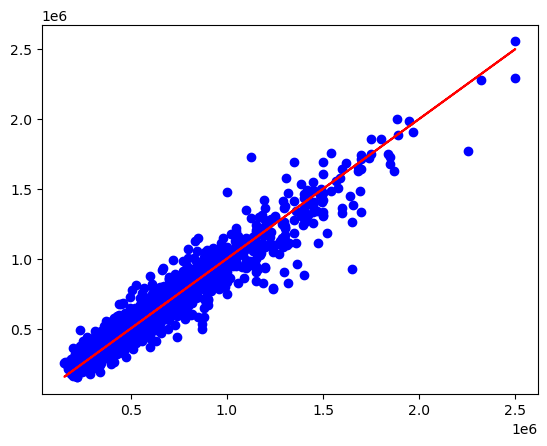

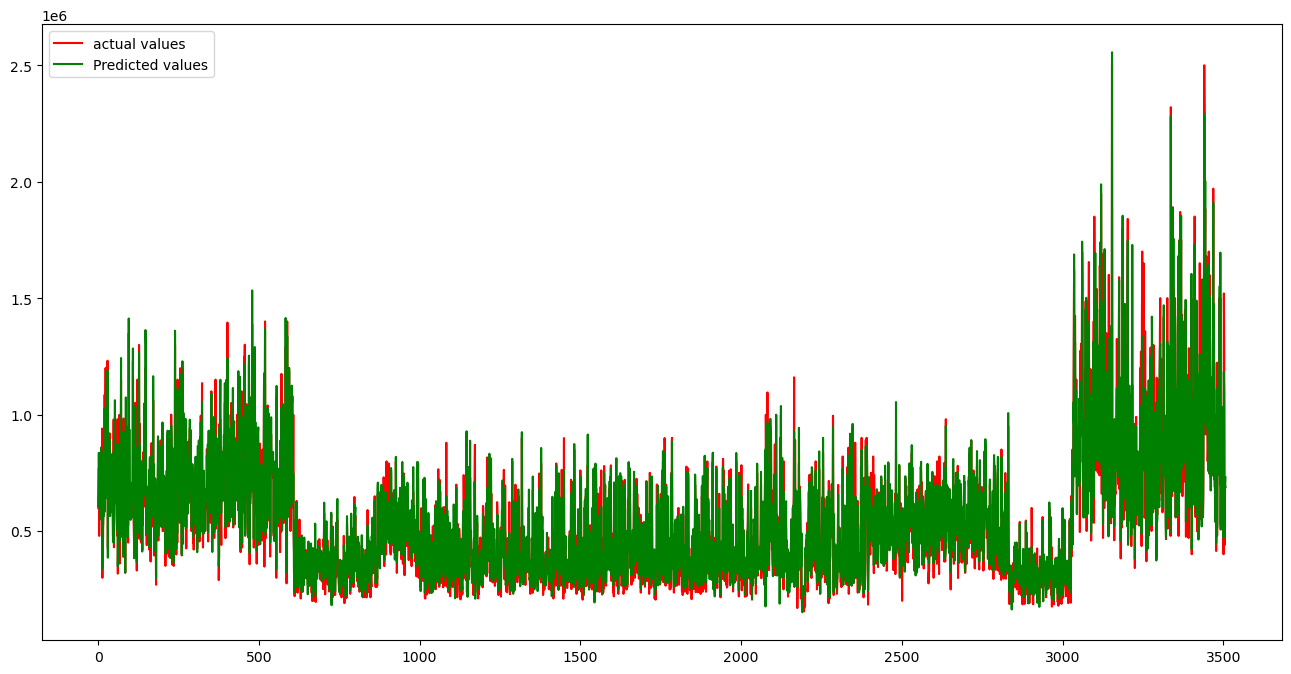

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 48103612416.0000 - mean_absolute_percentage_error: 21.3251 - mean_absolute_error: 136934.8906 - logcosh: 136934.2656
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 18858663936.0000 - mean_absolute_percentage_error: 14.4350 - mean_absolute_error: 95022.3828 - logcosh: 95021.7344
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 18123216896.0000 - mean_absolute_percentage_error: 14.1665 - mean_absolute_error: 93159.7422 - logcosh: 93159.0547
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 17422465024.0000 - mean_absolute_percentage_error: 13.7793 - mean_absolute_error: 90978.2031 - logcosh: 90977.3906
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 17139531776.0000 - mean_absolute_percentage_error: 13.6227 - mean

987/987 [==============================] - 3s 3ms/step - loss: 10298006528.0000 - mean_absolute_percentage_error: 10.8081 - mean_absolute_error: 70607.4609 - logcosh: 70606.7734
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 10015036416.0000 - mean_absolute_percentage_error: 10.6379 - mean_absolute_error: 69578.3984 - logcosh: 69577.6172
Epoch 45/100
987/987 [==============================] - 2s 3ms/step - loss: 9819440128.0000 - mean_absolute_percentage_error: 10.5745 - mean_absolute_error: 69049.1875 - logcosh: 69048.4062
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 9700969472.0000 - mean_absolute_percentage_error: 10.5259 - mean_absolute_error: 68655.5781 - logcosh: 68654.8438
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 9724188672.0000 - mean_absolute_percentage_error: 10.5365 - mean_absolute_error: 68792.8438 - logcosh: 68792.1484
Epoch 48/100
987/987 [==============================] - 3s 3m

987/987 [==============================] - 2s 3ms/step - loss: 4717752832.0000 - mean_absolute_percentage_error: 7.5365 - mean_absolute_error: 48303.3164 - logcosh: 48302.6562
Epoch 87/100
987/987 [==============================] - 2s 2ms/step - loss: 4567508480.0000 - mean_absolute_percentage_error: 7.4407 - mean_absolute_error: 47704.4766 - logcosh: 47703.7969
Epoch 88/100
987/987 [==============================] - 2s 2ms/step - loss: 4397797376.0000 - mean_absolute_percentage_error: 7.3268 - mean_absolute_error: 46814.4297 - logcosh: 46813.7344
Epoch 89/100
987/987 [==============================] - 2s 2ms/step - loss: 4335340544.0000 - mean_absolute_percentage_error: 7.2495 - mean_absolute_error: 46415.9805 - logcosh: 46415.3008
Epoch 90/100
987/987 [==============================] - 2s 2ms/step - loss: 4315546112.0000 - mean_absolute_percentage_error: 7.2389 - mean_absolute_error: 46272.3594 - logcosh: 46271.6445
Epoch 91/100
987/987 [==============================] - 2s 2ms/step 

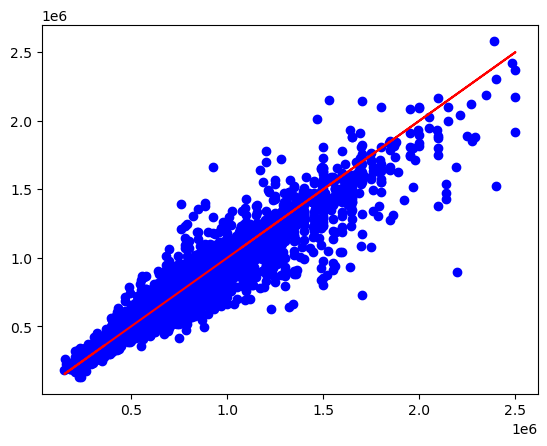

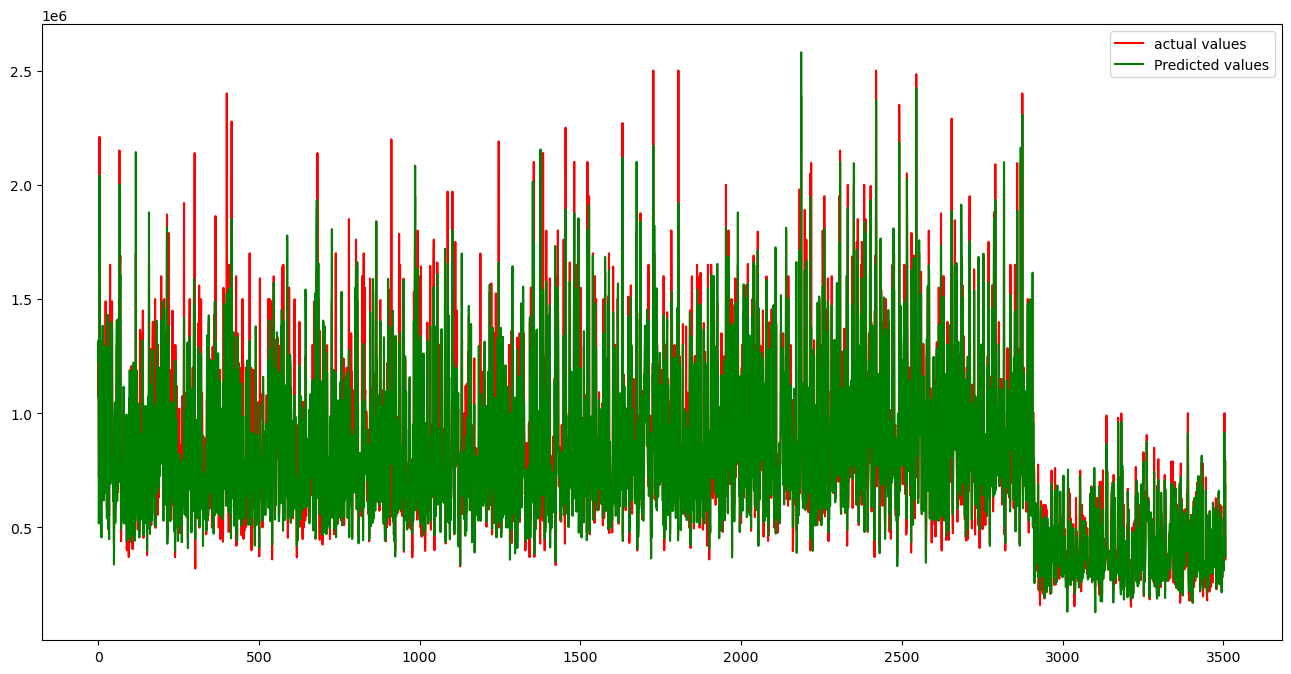

In [7]:
kfold = KFold(n_splits=10)
fold_no = 1
for train, test in kfold.split(features, labels):
    model = create_model()
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 100)
    model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1